<a id = "1"></a>
<div>
    <div style='float:left; width:55%; overflow:hidden'>
        <br><br><br><br>
        <span style = "float:right;">
        <h2><strong><span style='color:#17202a'> Forecasting and Time Series Analysis 📈 - LSTM 💥🔥 </span></strong></h2>
        <h4><b><span style="color:#273746"> Share Market Forecasting live data </span></b></h4> 
        <p><span style="color:#566573"> By Piyush Mahajan </span></p>
        <br>
        <b></b>
    </div>
    <div style="float:rigth; width:40%; max-height:300px; overflow: hidden;">
        <img src = 'https://i.pinimg.com/originals/65/56/d1/6556d1f996900f1b315db64ae955d524.png' width = '500px' height='300px'>
    </div>
</div>

**Hello Guys 🖐**

This is Simple Starter Notebook for **Share market forecasting using LSTM**. 

- The Purpose of this Project/Notebook is to help Invester in investing money in stock market (especially me 😅). 

- In This Notebook, I am Using yahoo finance library to extract 5 years of share market data of **TATAMOTORS** company (India) and for visualization purpose I am extensively using plotly because of its interactive plots.

- I am using 5 years **day-wise** data for building lstm, extracted from date 08-03-2017 to 02-03-2022

- If you are starting to learn Time Series data and model building, I hope this notebook will help you.

> **NOTE** I am using two libraries yfinance and yahoofinancials just because to explore 🚵‍♀️, you can use any one of them.

**<h3><span style="color: #f08ec9 ">About Dataset: </span></h3>**

1. **Open** - It is a Opening price of stock at that date.

2. **High** - The highest price reached by stock at that day.
3. **Low**- The Lowest price reached by stock at that day.
4. **Close** - It is the Closing price of stock that is, Price of stock at closing time of share market.
5. **Volume** - It is the total number of shares exchanged at that day. 

I am not going to used other two columns but they may be useful in forecasting but i am going to ignore them.

<a id='2'></a>
# <span style= "color: #5494ff " id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Table of Content](#2)
- [1. Libraries](#3)
- [2. Importing and Creation of dataset](#4)
- [3. Exploring dataset and Visualization](#5)
    - [3.1 Changing Format of dataset](#5.1)
    - [3.2 Line and Candle Plot](#5.2)
    - [3.3 Volume plot](#5.3)
    - [3.4 Combinated Candle and Volume plot](#5.4)
    - [3.5 Box Plot](#5.5)
    - [3.6 Histogram for distribution on values](#5.6)
    - [3.7 Moving average line plot](#5.7)
    - [3.8 Manipulating dataset](#5.8)
- [4. Dataset Creation for LSTM](#6)
    - [4.1 Mean Value Dataset](#6.1)
    - [4.2 Volume Dataset](#6.2)
    - [4.3 Price and Volume Combined dataset](#6.3)
- [5 Splitting dataset](#7)
    - [5.1 Splitting dataframe](#7.1)
    - [5.2 Splitting Combined data](#7.2)
- [6. Model Building](#8)
    - [6.1 Imports](#8.1)


<a id="3"></a>
# <span><center style="background-color: ; color: #5494ff ;"><strong>1. Libraries 📚</strong></center></span>

In [228]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline


In [229]:
red_palette = ['#470202','#5e0202','#750202','#8b0202',
'#9d0101','#ac0202','#ba0303','#ca0202','#da0303','#eb0202','#fd0505','#fa2727']

sns.color_palette(red_palette)

[(0.2784313725490196, 0.00784313725490196, 0.00784313725490196),
 (0.3686274509803922, 0.00784313725490196, 0.00784313725490196),
 (0.4588235294117647, 0.00784313725490196, 0.00784313725490196),
 (0.5450980392156862, 0.00784313725490196, 0.00784313725490196),
 (0.615686274509804, 0.00392156862745098, 0.00392156862745098),
 (0.6745098039215687, 0.00784313725490196, 0.00784313725490196),
 (0.7294117647058823, 0.011764705882352941, 0.011764705882352941),
 (0.792156862745098, 0.00784313725490196, 0.00784313725490196),
 (0.8549019607843137, 0.011764705882352941, 0.011764705882352941),
 (0.9215686274509803, 0.00784313725490196, 0.00784313725490196),
 (0.9921568627450981, 0.0196078431372549, 0.0196078431372549),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [230]:
a = sns.dark_palette(red_palette[-1], n_colors=12)
a

[(0.1897764851237823, 0.13402828367662906, 0.13400379197324536),
 (0.2610869182610221, 0.13573415243843714, 0.13571186979065275),
 (0.3323973513982619, 0.13744002120024523, 0.13741994760806014),
 (0.4037077845355016, 0.13914588996205332, 0.13912802542546754),
 (0.478118671287404, 0.14092592693089653, 0.1409103674958057),
 (0.5494291044246438, 0.14263179569270462, 0.1426184453132131),
 (0.6207395375618836, 0.14433766445451268, 0.1443265231306205),
 (0.6920499706991233, 0.14604353321632077, 0.1460346009480279),
 (0.7664608574510257, 0.14782357018516398, 0.14781694301836606),
 (0.8377712905882655, 0.14952943894697207, 0.14952502083577346),
 (0.9090817237255052, 0.15123530770878016, 0.15123309865318085),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [231]:
PATH = os.getcwd()

In [232]:
CSV_PATH = 'H:\\Excelr\\Project\\Stock_Prediction\\csv_files\\'

<a id = '4'></a>
# <span><center style=' color: #5494ff '><strong>2. Importing dataset 📈📊</strong></center></span>

In [233]:
# tatamotors = yf.Ticker('TATAMOTORS.NS')
tatamotors_financials = YahooFinancials('TATAMOTORS.NS')

In [234]:
# tatamotors_financial=tatamotors_financials.get_historical_price_data(start_date='2021-11-01',
#     end_date = '2022-03-01', time_interval = 'weekly')
# tatamotors_financial = pd.DataFrame(tatamotors_financial['TATAMOTORS.NS']['prices'])

In [235]:
# tatamotors_2m = tatamotors.history('max', interval='2m', start= '2022-02-01')  # YYYY-MM-DD
# tatamotors_5year = tatamotors.history('max', interval='1d', start= '2021-11-01')

In [236]:
# str(datetime.datetime.now()-datetime.timedelta(days=60))

In [237]:
def Fetch_data(symbol, interval = '1d', data_of_years = 1):
    if interval in ['2m', '5m', '15m', '30m']:
        print('Sorry, but only 2 month data can be extracted for given interval')
        current_time = datetime.datetime.now()
        month_value = current_time.month - 2       
        """
        Following can be used to get 2 month previous date
        datetime.datetime.now()-datetime.timedelta(days=60)
        """
        starting_date = current_time.replace(month= month_value)
    else:
        year_value = datetime.datetime.now().year-data_of_years
        ending_date = datetime.datetime.now()
        starting_date = ending_date.replace(year=year_value)
    data = yf.Ticker(symbol)
    data = data.history(interval=interval, start= starting_date)
    return data

def save_to_csv(data, file_name, location = 'H:\Excelr\Project\Stock_Prediction\csv_files/'):
    file_name = location+file_name
    data.to_csv(file_name)

To save dataset

In [238]:
# t = Fetch_data('TATAMOTORS.NS', data_of_years= 5)
# save_to_csv(t, 'Tatamotors_5years.csv')
# t = Fetch_data('TATAMOTORS.NS', interval= '2m')
# save_to_csv(t, 'Tatamotors_2m.csv')
# t = Fetch_data('INFY.NS', data_of_years= 1)
# save_to_csv(t, 'Infosys_5years.csv')

In [239]:
# (t.index[1:]-t.index[:-1]).value_counts()

In [240]:
tatamotors_5year = pd.read_csv(os.path.join(CSV_PATH,'Tatamotors_5years.csv'))
tatamotors_2m = pd.read_csv(os.path.join(CSV_PATH+'Tatamotors_2m.csv'))

In [241]:
# tatamotors_financial.head(5)

In [242]:
tatamotors_2m.head(10)

Datetime        Open        High         Low       Close  \
0  2022-01-20 09:15:00+05:30  519.950012  522.900024  518.299988  522.099976   
1  2022-01-20 09:17:00+05:30  522.150024  522.250000  520.250000  521.849976   
2  2022-01-20 09:19:00+05:30  521.750000  521.900024  518.150024  519.099976   
3  2022-01-20 09:21:00+05:30  519.250000  519.250000  517.000000  518.000000   
4  2022-01-20 09:23:00+05:30  518.000000  518.599976  517.650024  518.450012   
5  2022-01-20 09:25:00+05:30  518.450012  519.000000  517.799988  518.900024   
6  2022-01-20 09:27:00+05:30  518.599976  519.750000  518.200012  519.549988   
7  2022-01-20 09:29:00+05:30  519.599976  521.750000  519.349976  521.599976   
8  2022-01-20 09:31:00+05:30  521.700012  521.799988  521.049988  521.400024   
9  2022-01-20 09:33:00+05:30  521.349976  521.650024  521.000000  521.650024   

   Volume  Dividends  Stock Splits  
0  281714          0             0  
1  332337          0             0  
2  465151          0             0  
3  420753          0             0  
4  198417          0             0  
5  171080          0             0  
6  135341          0             0  
7  216447          0             0  
8  192900          0             0  
9  122506          0             0

In [243]:
tatamotors_5year.head()

Date        Open        High         Low       Close   Volume  \
0  2017-03-08  469.399994  469.600006  461.149994  462.799988  5351597   
1  2017-03-09  462.450012  469.700012  462.000000  467.600006  3837624   
2  2017-03-10  471.000000  471.850006  465.100006  469.100006  5766815   
3  2017-03-14  481.000000  483.000000  468.450012  469.750000  6348198   
4  2017-03-15  475.000000  476.549988  470.649994  473.450012  4801312   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0

In [244]:
tatamotors_5year.tail()

Date        Open        High         Low       Close    Volume  \
1231  2022-03-02  452.950012  454.250000  444.549988  447.600006  25791134   
1232  2022-03-03  458.500000  458.500000  435.000000  437.100006  29599672   
1233  2022-03-04  431.850006  431.850006  414.750000  417.250000  38765185   
1234  2022-03-07  401.750000  401.750000  387.500000  394.000000  44836205   
1235  2022-03-08  390.500000  395.450012  376.350006  391.750000  55526844   

      Dividends  Stock Splits  
1231          0             0  
1232          0             0  
1233          0             0  
1234          0             0  
1235          0             0

<a id="5"></a> 
# <span><center style="color: #5494ff "><strong>3. Exploring Dataset and Visualization </strong> </center></span>

<a id = "5.1"></a>
## **<span style = "color: #5494ff ;">3.1 Changing Format of dataset</span>**

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### **<span style= 'color: #5494ff '>Changing format of 1 year dataset</span>**

In [245]:
tatamotors_5year.Date[1]

'2017-03-09'

In [246]:
# tatamotors_5year['Date_1'] = tatamotors_5year.Date
tatamotors_5year['Date'] = pd.to_datetime(tatamotors_5year.Date)
tatamotors_5year['Index'] = tatamotors_5year.Date
tatamotors_5year=tatamotors_5year.set_index('Index')
# tatamotors_5year['Date']=tatamotors_5year.Date.astype('datetime64')

In [247]:
tatamotors_5year['Years'] = tatamotors_5year.Date.dt.year
tatamotors_5year['Months'] = tatamotors_5year.Date.dt.month
tatamotors_5year['Days'] = tatamotors_5year.Date.dt.day
tatamotors_5year['Day_name'] = tatamotors_5year.Date.dt.day_name()

In [248]:
tatamotors_5year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-03-08 to 2022-03-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1236 non-null   datetime64[ns]
 1   Open          1236 non-null   float64       
 2   High          1236 non-null   float64       
 3   Low           1236 non-null   float64       
 4   Close         1236 non-null   float64       
 5   Volume        1236 non-null   int64         
 6   Dividends     1236 non-null   int64         
 7   Stock Splits  1236 non-null   int64         
 8   Years         1236 non-null   int64         
 9   Months        1236 non-null   int64         
 10  Days          1236 non-null   int64         
 11  Day_name      1236 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 125.5+ KB


In [249]:
tatamotors_5year.head()

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   
2017-03-09 2017-03-09  462.450012  469.700012  462.000000  467.600006   
2017-03-10 2017-03-10  471.000000  471.850006  465.100006  469.100006   
2017-03-14 2017-03-14  481.000000  483.000000  468.450012  469.750000   
2017-03-15 2017-03-15  475.000000  476.549988  470.649994  473.450012   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  
Index                                                                         
2017-03-08  5351597          0             0   2017       3     8  Wednesday  
2017-03-09  3837624          0             0   2017       3     9   Thursday  
2017-03-10  5766815          0             0   2017       3    10     Friday  
2017-03-14  6348198          0             0   2017       3    14    Tuesday  
2017-03-15  4801312          0             0   2017       3    15  Wednesday

In [250]:
tatamotors_5year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

In [251]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=tatamotors_5year.index[0],end=tatamotors_5year.index[-1])# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(tatamotors_5year.index)]# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [252]:
print(f'The first 5 break days are {dt_breaks[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks)}')

The first 5 break days are ['2017-03-11', '2017-03-12', '2017-03-13', '2017-03-18', '2017-03-19']

Total number of break days are 591


### **<span style= "color:  #5494ff  ">Changing format of 2 min dataset</span>**

In [253]:
tatamotors_2m['Date'] = pd.to_datetime(tatamotors_2m.Datetime)
tatamotors_2m['Index'] = tatamotors_2m.Date
tatamotors_2m = tatamotors_2m.set_index('Index')
# tatamotors_2m['Date']=tatamotors_2m.Date.astype('datetime64')

In [254]:
tatamotors_2m['Hour']=tatamotors_2m.Date.dt.hour
tatamotors_2m['Day_name']=tatamotors_2m.Date.dt.day_name()

In [255]:
# removing all empty datesb
# build complete timeline from start date to end date
dt_all_hr = pd.date_range(start=tatamotors_2m.index[0],end=tatamotors_2m.index[-1])# retrieve the dates that ARE in the original datset
dt_obs_hr = [d.strftime("%Y-%m-%d %H:%M:%S") for d in pd.to_datetime(tatamotors_2m.index)]# define dates with missing values
dt_breaks_hr = [d for d in dt_all_hr.strftime("%Y-%m-%d %H:%M:%S").tolist() if not d in dt_obs_hr]

In [256]:
print(f'The first 5 break days are {dt_breaks_hr[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks_hr)}')

The first 5 break days are ['2022-01-22 09:15:00', '2022-01-23 09:15:00', '2022-01-26 09:15:00', '2022-01-29 09:15:00', '2022-01-30 09:15:00']

Total number of break days are 16


<a id = '5.2'> </a>
## **<span style = 'color: #5494ff '>3.2 Line and Candle plots </span>**

### **<span style= 'color: #5494ff '>Line plot day wise</span>**

In [257]:
fig = go.Figure([go.Scatter(x= tatamotors_5year.index, y = tatamotors_5year['High'])])
fig.update_layout(hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])
fig.show()

### **<span style= 'color: #5494ff '>Candle plot day wise</span>**

In [258]:
# Plot with all gaps
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
# fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [259]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [260]:
# Day map without any gap

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])


fig.show()

### **<span style= 'color: #5494ff '>OHLC plot day wise</span>**

In [261]:
ohlc = go.Figure(data = [go.Ohlc(x = tatamotors_5year.index, 
                open = tatamotors_5year[('Open')],
                high = tatamotors_5year[('High')],
                low = tatamotors_5year[('Low')],
                close = tatamotors_5year[('Close')])])

ohlc.update_xaxes(title_text = 'Time', rangeslider_visible = True,
    rangebreaks = [dict(values = dt_breaks)])
ohlc.show()

In [262]:
# # To check the gaps between time series
(tatamotors_5year.index[1:]-tatamotors_5year.index[:-1]).value_counts().head()

1 days    938
3 days    227
2 days     37
4 days     32
5 days      1
Name: Index, dtype: int64

In [263]:
# tatamotors_5year = tatamotors_5year.reindex(range(tatamotors_5year.index[0],tatamotors_5year.index[-1]+1,1),mday_mapod='pad')

### **<span style= 'color: #5494ff '>Candle plot minute wise</span>**

In [264]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(pattern='hour', bounds=[15.5,9.5]), 
        dict(bounds = ['sat', 'mon'])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [265]:
# hr map without any break
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks_hr), dict(pattern='hour', bounds=[15.5, 9.24])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [266]:
tatamotors_5year.head(1)

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  
Index                                                                         
2017-03-08  5351597          0             0   2017       3     8  Wednesday

<a id = '5.3'></a>
## **<span style= 'color: #5494ff '>3.3 Volume plot </span>**

### **<span style= 'color: #5494ff '>Day Wise Volume plot</span>**

In [267]:
area = px.area(data_frame= tatamotors_5year, 
    x = tatamotors_5year.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
area.show()

### **<span style= 'color: #5494ff '>Minute wise dataset</span>**

In [268]:
area = px.area(data_frame= tatamotors_2m, 
    x = tatamotors_2m.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks_hr), dict(pattern='hour', bounds=[15.5, 9.24])])
area.show()

<a id = '5.4'></a>
## **<span style= 'color: #5494ff '>3.4 Combination of Candle plot & Volume plot </span>**

In [269]:
def Combo_candle_volume_plot(data,day_gap=None, height = 800, width = 1000, slider = False):
    fig = make_subplots(rows= 2, cols= 1)

    fig.append_trace(go.Candlestick(x = data.index, 
                    open = data['Open'],
                    high = data['High'],
                    low = data['Low'],
                    close = data['Close']), row = 1, col = 1)

    fig.update_xaxes(rangebreaks = [dict(values = day_gap)])
    fig.append_trace(go.Scatter(x = data.index, 
            y = data.Volume, fill='tozeroy'), row = 2, col = 1)

    
    fig.update_layout(xaxis_rangeslider_visible = slider, hovermode = 'x unified')
    fig.update_layout(height = height, width = width)
    fig.show()

In [270]:
Combo_candle_volume_plot(tatamotors_5year, dt_breaks)

In [271]:
# Plotting one day candle and volume plots
data_for_date = '04-03-2022'
date = datetime.datetime.strptime(data_for_date, '%d-%m-%Y').date()
Combo_candle_volume_plot(tatamotors_2m.loc[tatamotors_2m.Date.dt.date == date,:],)

<a id = '5.5'></a>
## **<span style= 'color: #5494ff '>3.5 Box Plots</span>**

<AxesSubplot:xlabel='Months', ylabel='High'>

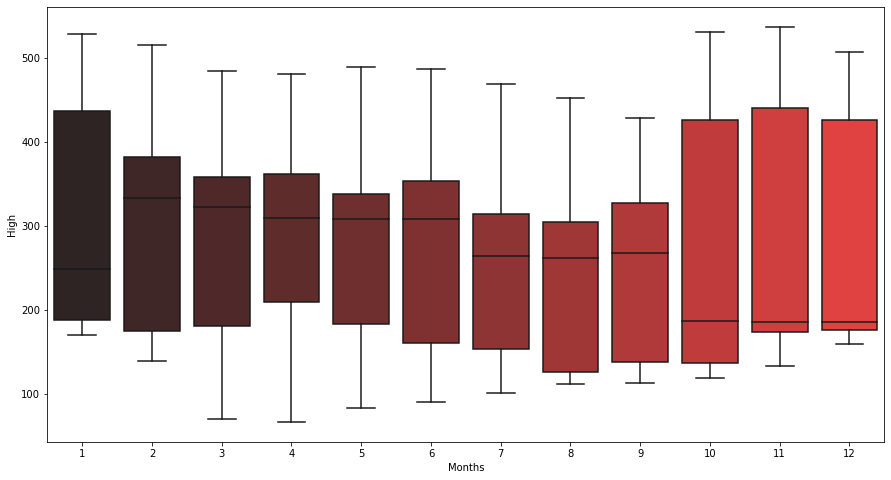

In [272]:
plt.figure(figsize= (15,8))
sns.boxplot(x = tatamotors_5year.Months, y = tatamotors_5year.High, palette= a)

In [273]:
px.box(x = tatamotors_5year.Months, 
    y = tatamotors_5year.High)

In [274]:
px.box(x = tatamotors_5year.Day_name, y = tatamotors_5year.High)

<a id = '5.6'></a>
## **<span style= 'color: #5494ff '>3.6 Histogram for Distribution on values</span>**

In [275]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = tatamotors_5year.Open, name='Open'))
fig.add_trace(go.Histogram(x = tatamotors_5year.Low, name='Low'))
fig.add_trace(go.Histogram(x = tatamotors_5year.High, name= 'High'))

fig.show()

In [276]:
px.histogram(x = tatamotors_5year.Open)

<a id = '3.7'></a>
## **<span style= 'color: #5494ff '>3.7 Moving average line plot</span>**

In [277]:
tatamotors_5year['Moving_avg_2'] = tatamotors_5year.High.rolling(2).mean()
tatamotors_5year['Moving_avg_5'] = tatamotors_5year.High.rolling(5).mean()
tatamotors_5year['Moving_avg_10'] = tatamotors_5year.High.rolling(10).mean()

In [278]:
tatamotors_5year[['High', 'Moving_avg_2', 'Moving_avg_5']].head(5)

High  Moving_avg_2  Moving_avg_5
Index                                             
2017-03-08  469.600006           NaN           NaN
2017-03-09  469.700012    469.650009           NaN
2017-03-10  471.850006    470.775009           NaN
2017-03-14  483.000000    477.425003           NaN
2017-03-15  476.549988    479.774994    474.140002

In [279]:
fig = px.line(data_frame=tatamotors_5year.iloc[:100,:], 
        x = tatamotors_5year.index[:100],
        y = ['High', 'Moving_avg_2', 'Moving_avg_5', 'Moving_avg_10'])
fig.update_layout(hovermode = 'x unified')

<a id = '3.8'></a>
## **<span style= 'color: #5494ff '>3.8 Differencing dataset<span>**

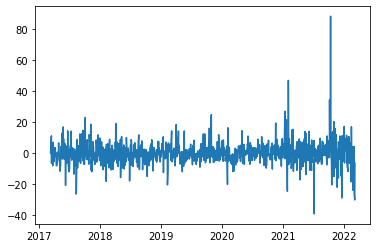

In [280]:
plt.plot(tatamotors_5year.High.diff(1))

In [281]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tatamotors_5year.index, y = tatamotors_5year['High'].pct_change(1)))
# fig.add_trace(go.Line())
fig.show()

# <span><center style="color:#5494ff"><strong>4. Dataset Creation for LSTM</strong></center></span>

In [282]:
tatamotors_5year.head(5)

Date        Open        High         Low       Close  \
Index                                                                   
2017-03-08 2017-03-08  469.399994  469.600006  461.149994  462.799988   
2017-03-09 2017-03-09  462.450012  469.700012  462.000000  467.600006   
2017-03-10 2017-03-10  471.000000  471.850006  465.100006  469.100006   
2017-03-14 2017-03-14  481.000000  483.000000  468.450012  469.750000   
2017-03-15 2017-03-15  475.000000  476.549988  470.649994  473.450012   

             Volume  Dividends  Stock Splits  Years  Months  Days   Day_name  \
Index                                                                          
2017-03-08  5351597          0             0   2017       3     8  Wednesday   
2017-03-09  3837624          0             0   2017       3     9   Thursday   
2017-03-10  5766815          0             0   2017       3    10     Friday   
2017-03-14  6348198          0             0   2017       3    14    Tuesday   
2017-03-15  4801312          0             0   2017       3    15  Wednesday   

            Moving_avg_2  Moving_avg_5  Moving_avg_10  
Index                                                  
2017-03-08           NaN           NaN            NaN  
2017-03-09    469.650009           NaN            NaN  
2017-03-10    470.775009           NaN            NaN  
2017-03-14    477.425003           NaN            NaN  
2017-03-15    479.774994    474.140002            NaN

In [283]:
tatamotors_5year['Mean']=np.mean(tatamotors_5year.iloc[:,1:5], axis = 1)

In [284]:
tatamotors_2m['Mean'] = np.mean(tatamotors_2m.iloc[:,1:5], axis = 1)

In [285]:
# To create dataset for LSTM
def Time_series_dataset(data_column, time_steps):
    dataset = []
    target = []
    for i in range(data_column.shape[0]-time_steps-1):
        a = data_column[i:time_steps+i].to_list()
        target_value = data_column[time_steps+i]
        target.append(target_value)
        dataset.append(a)
    df = pd.DataFrame(dataset)
    df['Target'] = target
    return df

<a id = '4.1'></a>
## **<span style= 'color: #5494ff '>4.1 Mean Value Dataset</span>**

### **<span style= 'color: #5494ff '>Day wise dataset</span>**

In [286]:
mean_value_dataset = Time_series_dataset(tatamotors_5year.Mean, 50)
mean_value_dataset.shape

(1185, 51)

In [287]:
mean_value_dataset.head(5)

0           1           2           3           4           5  \
0  465.737495  465.437508  469.262505  475.550003  473.912498  479.450005   
1  465.437508  469.262505  475.550003  473.912498  479.450005  478.437508   
2  469.262505  475.550003  473.912498  479.450005  478.437508  475.375000   
3  475.550003  473.912498  479.450005  478.437508  475.375000  475.112495   
4  473.912498  479.450005  478.437508  475.375000  475.112495  464.575005   

            6           7           8           9  ...          41  \
0  478.437508  475.375000  475.112495  464.575005  ...  429.274994   
1  475.375000  475.112495  464.575005  468.124992  ...  430.337502   
2  475.112495  464.575005  468.124992  470.874992  ...  430.437500   
3  464.575005  468.124992  470.874992  466.250000  ...  432.500000   
4  468.124992  470.874992  466.250000  470.099998  ...  435.312500   

           42          43          44          45          46          47  \
0  430.337502  430.437500  432.500000  435.312500  443.300003  441.162506   
1  430.437500  432.500000  435.312500  443.300003  441.162506  440.475006   
2  432.500000  435.312500  443.300003  441.162506  440.475006  447.750000   
3  435.312500  443.300003  441.162506  440.475006  447.750000  450.675003   
4  443.300003  441.162506  440.475006  447.750000  450.675003  467.750000   

           48          49      Target  
0  440.475006  447.750000  450.675003  
1  447.750000  450.675003  467.750000  
2  450.675003  467.750000  472.425003  
3  467.750000  472.425003  479.237503  
4  472.425003  479.237503  480.199997  

[5 rows x 51 columns]

### **<span style= 'color: #5494ff '>Minute wise dataset</span>**

In [288]:
mean_value_dataset_minute = Time_series_dataset(tatamotors_2m.Mean, 50)

In [289]:
mean_value_dataset_minute.head(5)

0           1           2           3           4           5  \
0  520.812500  521.625000  520.225006  518.375000  518.175003  518.537506   
1  521.625000  520.225006  518.375000  518.175003  518.537506  519.024994   
2  520.225006  518.375000  518.175003  518.537506  519.024994  520.574982   
3  518.375000  518.175003  518.537506  519.024994  520.574982  521.487503   
4  518.175003  518.537506  519.024994  520.574982  521.487503  521.412506   

            6           7           8           9  ...          41  \
0  519.024994  520.574982  521.487503  521.412506  ...  518.949997   
1  520.574982  521.487503  521.412506  521.237518  ...  518.712509   
2  521.487503  521.412506  521.237518  521.962494  ...  518.162506   
3  521.412506  521.237518  521.962494  522.712494  ...  517.437485   
4  521.237518  521.962494  522.712494  522.350006  ...  517.475006   

           42          43          44          45          46          47  \
0  518.712509  518.162506  517.437485  517.475006  517.650009  518.000000   
1  518.162506  517.437485  517.475006  517.650009  518.000000  518.350006   
2  517.437485  517.475006  517.650009  518.000000  518.350006  518.300003   
3  517.475006  517.650009  518.000000  518.350006  518.300003  517.950012   
4  517.650009  518.000000  518.350006  518.300003  517.950012  517.799988   

           48          49      Target  
0  518.350006  518.300003  517.950012  
1  518.300003  517.950012  517.799988  
2  517.950012  517.799988  517.574997  
3  517.799988  517.574997  517.675018  
4  517.574997  517.675018  518.087509  

[5 rows x 51 columns]

<a id = '6.2'></a>
## **<span style= 'color: #5494ff '>4.2 Volume dataset</span>**

### **<span style= 'color: #5494ff '>Day wise</span>**

In [290]:
volume_dataset = Time_series_dataset(tatamotors_5year.Volume, 50)

In [291]:
volume_dataset.head(5)

0        1        2        3        4        5        6        7  \
0  5351597  3837624  5766815  6348198  4801312  6272947  6338248  2871104   
1  3837624  5766815  6348198  4801312  6272947  6338248  2871104  4685410   
2  5766815  6348198  4801312  6272947  6338248  2871104  4685410  4695648   
3  6348198  4801312  6272947  6338248  2871104  4685410  4695648  8665384   
4  4801312  6272947  6338248  2871104  4685410  4695648  8665384  4296510   

         8        9  ...       41       42       43       44       45  \
0  4685410  4695648  ...  5378402  4049649  3850940  1885702  3452072   
1  4695648  8665384  ...  4049649  3850940  1885702  3452072  6572678   
2  8665384  4296510  ...  3850940  1885702  3452072  6572678  6158546   
3  4296510  4417413  ...  1885702  3452072  6572678  6158546  4387481   
4  4417413  2982614  ...  3452072  6572678  6158546  4387481  6145914   

         46        47        48        49    Target  
0   6572678   6158546   4387481   6145914  10330814  
1   6158546   4387481   6145914  10330814  27370795  
2   4387481   6145914  10330814  27370795  15108872  
3   6145914  10330814  27370795  15108872   7692869  
4  10330814  27370795  15108872   7692869   4253044  

[5 rows x 51 columns]

### **<span style= 'color: #5494ff '>Minute wise volume</span>**

In [292]:
volume_dataset_min = Time_series_dataset(tatamotors_2m.Volume, 50)
volume_dataset_min.shape

(5948, 51)

In [293]:
volume_dataset_min.head(5)

0       1       2       3       4       5       6       7       8  \
0  281714  332337  465151  420753  198417  171080  135341  216447  192900   
1  332337  465151  420753  198417  171080  135341  216447  192900  122506   
2  465151  420753  198417  171080  135341  216447  192900  122506  114352   
3  420753  198417  171080  135341  216447  192900  122506  114352  241149   
4  198417  171080  135341  216447  192900  122506  114352  241149  330262   

        9  ...      41      42      43      44      45     46     47     48  \
0  122506  ...   83557   42109  230514  157878  127469  50698  46505  36770   
1  114352  ...   42109  230514  157878  127469   50698  46505  36770  43598   
2  241149  ...  230514  157878  127469   50698   46505  36770  43598  36757   
3  330262  ...  157878  127469   50698   46505   36770  43598  36757  36267   
4  109249  ...  127469   50698   46505   36770   43598  36757  36267  39741   

      49  Target  
0  43598   36757  
1  36757   36267  
2  36267   39741  
3  39741   23024  
4  23024   59187  

[5 rows x 51 columns]

<a id = '6.3'></a>
## **<span style= 'color: #5494ff '>4.3 Price and Volume Combined dataset</span>**

In [485]:
def Combo_price_and_volume(data, time_step, column, target_colm):
    n = len(column)
    for i in range(data.shape[0]-time_step-1):
        values = data[column][i:time_step+i].to_numpy().reshape(-1,time_step,n)
        target_value = data[target_colm].iloc[time_step+i,:].to_numpy()
        target_value = target_value.reshape(-1, target_value.shape[0])
        if i == 0:
            dataset = values
            target_values = target_value
        else:
            dataset = np.concatenate((dataset, values))
            target_values = np.concatenate((target_values, target_value))

    return dataset, target_values

In [489]:
combo_dataset, y = Combo_price_and_volume(tatamotors_5year, 50, column=['Open', 'Volume'], target_colm=['Open'])

In [491]:
combo_dataset_df = pd.DataFrame(combo_dataset[:,:,0])
combo_dataset_df['Y']= y

In [492]:
combo_dataset_df

0           1           2           3           4           5  \
0     469.399994  462.450012  471.000000  481.000000  475.000000  478.700012   
1     462.450012  471.000000  481.000000  475.000000  478.700012  481.350006   
2     471.000000  481.000000  475.000000  478.700012  481.350006  476.549988   
3     481.000000  475.000000  478.700012  481.350006  476.549988  478.000000   
4     475.000000  478.700012  481.350006  476.549988  478.000000  469.950012   
...          ...         ...         ...         ...         ...         ...   
1180  488.000000  459.899994  452.100006  458.149994  476.000000  474.899994   
1181  459.899994  452.100006  458.149994  476.000000  474.899994  465.700012   
1182  452.100006  458.149994  476.000000  474.899994  465.700012  475.200012   
1183  458.149994  476.000000  474.899994  465.700012  475.200012  478.750000   
1184  476.000000  474.899994  465.700012  475.200012  478.750000  472.549988   

               6           7           8           9  ...          41  \
0     481.350006  476.549988  478.000000  469.950012  ...  427.799988   
1     476.549988  478.000000  469.950012  461.299988  ...  434.000000   
2     478.000000  469.950012  461.299988  470.750000  ...  429.649994   
3     469.950012  461.299988  470.750000  469.000000  ...  434.000000   
4     461.299988  470.750000  469.000000  467.500000  ...  432.250000   
...          ...         ...         ...         ...  ...         ...   
1180  465.700012  475.200012  478.750000  472.549988  ...  476.149994   
1181  475.200012  478.750000  472.549988  472.700012  ...  504.000000   
1182  478.750000  472.549988  472.700012  493.500000  ...  505.899994   
1183  472.549988  472.700012  493.500000  496.799988  ...  498.000000   
1184  472.700012  493.500000  496.799988  486.950012  ...  490.149994   

              42          43          44          45          46          47  \
0     434.000000  429.649994  434.000000  432.250000  436.500000  442.000000   
1     429.649994  434.000000  432.250000  436.500000  442.000000  439.000000   
2     434.000000  432.250000  436.500000  442.000000  439.000000  446.000000   
3     432.250000  436.500000  442.000000  439.000000  446.000000  451.450012   
4     436.500000  442.000000  439.000000  446.000000  451.450012  470.000000   
...          ...         ...         ...         ...         ...         ...   
1180  504.000000  505.899994  498.000000  490.149994  480.549988  481.750000   
1181  505.899994  498.000000  490.149994  480.549988  481.750000  455.950012   
1182  498.000000  490.149994  480.549988  481.750000  455.950012  444.850006   
1183  490.149994  480.549988  481.750000  455.950012  444.850006  445.000000   
1184  480.549988  481.750000  455.950012  444.850006  445.000000  452.950012   

              48          49           Y  
0     439.000000  446.000000  451.450012  
1     446.000000  451.450012  470.000000  
2     451.450012  470.000000  470.000000  
3     470.000000  470.000000  474.100006  
4     470.000000  474.100006  482.500000  
...          ...         ...         ...  
1180  455.950012  444.850006  445.000000  
1181  444.850006  445.000000  452.950012  
1182  445.000000  452.950012  458.500000  
1183  452.950012  458.500000  431.850006  
1184  458.500000  431.850006  401.750000  

[1185 rows x 51 columns]

### **<span style= 'color: #5494ff '>Day wise Combined data</span>**

In [298]:
day_combo_data, day_combo_target = Combo_price_and_volume(tatamotors_5year,
     50, column=['Open', 'Volume'], target_colm= 'Open')

In [299]:
day_combo_data.shape, day_combo_target.shape

((1185, 50, 2), (1185,))

<a id = '7'></a>
# <span><center style="color:#5494ff"><strong>5. Split into Train, Test and Validation dataset</strong></center></span>

<a id = '7.1'></a>
## **<span style= 'color: #5494ff '>5.1 Splitting Dataframe</span>**

In [300]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

def Splitting_dataset(data, train_ratio = train_ratio, valid_ratio = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''

    obs = data.shape[0]
    training_rows = int(obs*train_ratio)
    if valid_ratio:
        valid_rows = int(obs*valid_ratio)
        A = training_rows+valid_rows
        x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
        x_val, y_val = data.iloc[training_rows:A, :-1].to_numpy(), data.iloc[training_rows:A, -1].to_numpy()
        x_test, y_test = data.iloc[A:,:-1].to_numpy(), data.iloc[A:,-1].to_numpy()
        return x_train, x_val, x_test, y_train, y_val, y_test
    else:
        x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
        x_test, y_test = data.iloc[training_rows:, :-1].to_numpy(), data.iloc[training_rows:,-1].to_numpy()
        return x_train, x_test, y_train, y_test

In [301]:
x_train_mean, x_val_mean, x_test_mean, y_train_mean, y_val_mean, y_test_mean = Splitting_dataset(
                mean_value_dataset, 0.8, 0.1)

In [302]:
x_train_mean.shape, x_test_mean.shape, x_val_mean.shape

((948, 50), (119, 50), (118, 50))

In [303]:
train_max = x_train_mean.max()
train_min = x_train_mean.min()

In [304]:
x_train_mean = (x_train_mean - train_min)/(train_max-train_min)
x_val_mean = (x_val_mean - train_min)/(train_max-train_min)
x_test_mean = (x_test_mean - train_min)/(train_max-train_min)

y_train_mean = (y_train_mean - train_min)/(train_max-train_min)
y_val_mean = (y_val_mean - train_min)/(train_max-train_min)
y_test_mean = (y_test_mean - train_min)/(train_max-train_min)

In [305]:
x_test_mean.shape

(119, 50)

In [306]:
x_train_mean = x_train_mean.reshape(x_train_mean.shape[0], x_train_mean.shape[1], 1)
x_val_mean = x_val_mean.reshape(x_val_mean.shape[0], x_val_mean.shape[1], 1)
x_test_mean = x_test_mean.reshape(x_test_mean.shape[0], x_test_mean.shape[1], 1)

In [307]:
x_train_mean.shape

(948, 50, 1)

<a id = '7.2'></a>
## **<span style= 'color: #5494ff '>5.2 Splitting Combined data</span>**

In [308]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

def Splitting_comb_dataset(data, target_variable, train_ratio = train_ratio, valid_ratio = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''

    obs = data.shape[0]
    training_rows = int(obs*train_ratio)
    if valid_ratio:
        valid_rows = int(obs*valid_ratio)
        A = training_rows+valid_rows
        x_train, y_train = data[:training_rows], target_variable[:training_rows]
        x_val, y_val = data[training_rows:A], target_variable[training_rows:A]
        x_test, y_test = data[A:], target_variable[A:]
        return x_train, x_val, x_test, y_train, y_val, y_test
    else:
        x_train, y_train = data[:training_rows], target_variable[:training_rows]
        x_test, y_test = data[training_rows:], target_variable[training_rows:]
        return x_train, x_test, y_train, y_test

In [309]:
x_train_comb, x_val_comb, x_test_comb, y_train_comb, y_val_comb, y_test_comb=Splitting_comb_dataset(
        day_combo_data, day_combo_target, valid_ratio=0.15)

In [310]:
x_train_comb.shape, y_train_comb.shape, x_val_comb.shape, x_test_comb.shape

((829, 50, 2), (829,), (177, 50, 2), (179, 50, 2))

<a id = '8'></a>
# <span><center style="color:#5494ff"><strong>6. Model Building</strong></center></span>

<a id = "8.1"></a>
## **<span style = "color: #5494ff ;">6.1 Imports</span>**

In [311]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [312]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [420]:
def Prediction_fun(last_steps, model, no_predictions):
    predictions = []
    last_values = last_steps.reshape(-1, last_steps.shape[0], last_steps.shape[1])
    for i in range(no_predictions):
        prediction = model.predict(last_values)
        predictions.extend(prediction.tolist())
        prediction = prediction.reshape(-1, prediction.shape[0], prediction.shape[1])
        last_values = np.concatenate((last_values[:,1:,:], prediction), axis = 1)
    return np.array(predictions)

def Reverse_transform(max, min, values):
    values = values*(max - min) + min
    return values

<a id = "8.2"></a>
## **<span style = "color: #5494ff ;">6.2 Neural Model Building</span>**

### **<span style = "color: #5494ff ;">6.2.1 Model 1 day_wise separate data</span>**

In [339]:
model = Sequential([
    LSTM(100, activation= 'relu', input_shape = (50,1)),
    Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanAbsoluteError(), metrics= [tf.keras.losses.MAE])

In [340]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 100)               40800     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


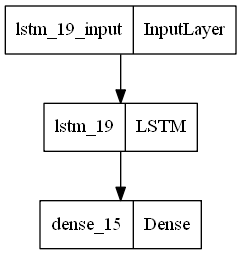

In [341]:
plot_model(model)

In [342]:
x_train_mean.shape

(948, 50, 1)

In [344]:
model.fit(x_train_mean, y_train_mean, shuffle=False, epochs= 10, validation_data= [x_val_mean, y_val_mean])

Epoch 1/10
30/30 [==============================] - 12s 397ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - val_loss: 0.1347 - val_mean_absolute_error: 0.1347
Epoch 2/10
30/30 [==============================] - 18s 601ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 3/10
30/30 [==============================] - 21s 684ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - val_loss: 0.0468 - val_mean_absolute_error: 0.0468
Epoch 4/10
30/30 [==============================] - 19s 630ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 5/10
30/30 [==============================] - 17s 541ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 6/10
30/30 [==============================] - 18s 615ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0623 - val_mean_absolute_error: 0.0623
Epoch 7/10

In [345]:
len(model.get_weights())

5

In [346]:
for a in model.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_19/lstm_cell_19/kernel:0
Weights shape is (1, 400)
Layer name is lstm_19/lstm_cell_19/recurrent_kernel:0
Weights shape is (100, 400)
Layer name is lstm_19/lstm_cell_19/bias:0
Weights shape is (400,)
Layer name is dense_15/kernel:0
Weights shape is (100, 1)
Layer name is dense_15/bias:0
Weights shape is (1,)


In [433]:
model.evaluate(x_test_mean, y_test_mean)

4/4 [==============================] - 0s 51ms/step - loss: 0.0478 - mean_absolute_error: 0.0478


[0.04778614640235901, 0.04778614640235901]

In [447]:
a = model.predict(x_test_mean)
a

array([[0.51674247],
       [0.52329224],
       [0.5300629 ],
       [0.5349754 ],
       [0.5351555 ],
       [0.53313303],
       [0.53518516],
       [0.5417878 ],
       [0.54903555],
       [0.5583542 ],
       [0.5677083 ],
       [0.5740462 ],
       [0.5815895 ],
       [0.587244  ],
       [0.59522104],
       [0.6039039 ],
       [0.6097535 ],
       [0.6235666 ],
       [0.64808065],
       [0.6772993 ],
       [0.7119791 ],
       [0.7742187 ],
       [0.8397922 ],
       [0.8963852 ],
       [0.93724173],
       [0.96366066],
       [0.99162227],
       [1.0126047 ],
       [1.0194249 ],
       [1.0289085 ],
       [1.0373418 ],
       [1.0338132 ],
       [1.0260903 ],
       [1.0190519 ],
       [1.0205984 ],
       [1.0143775 ],
       [1.0113465 ],
       [1.0127769 ],
       [1.020971  ],
       [1.0271615 ],
       [1.0327479 ],
       [1.0356933 ],
       [1.039631  ],
       [1.0468315 ],
       [1.0598402 ],
       [1.0661584 ],
       [1.0584978 ],
       [1.046

In [449]:
B=Reverse_transform(train_max, train_min, a)

In [451]:
future_predict = Reverse_transform(train_max, train_min, Prediction_fun(x_test_mean[-1], model, 20))

In [452]:
A = np.empty_like(y_test_mean)
A.fill(None)

In [453]:
A = np.concatenate((A, future_predict.ravel()))

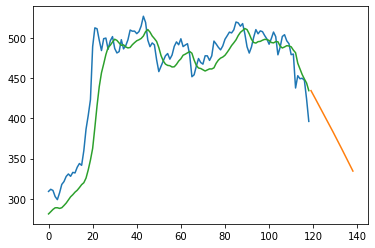

In [454]:
plt.plot(Reverse_transform(train_max, train_min, y_test_mean))
plt.plot(A)
plt.plot(B)

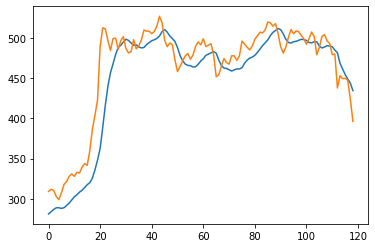

In [353]:
plt.plot(y)
plt.plot(y_t)

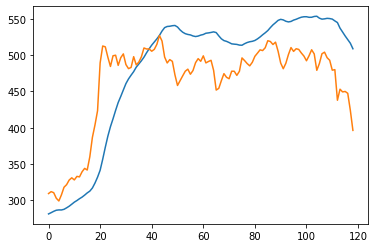

In [334]:
plt.plot(y)
plt.plot(y_t)

### **<span style = "color: #5494ff ;">6.2.2 Model 1 day_wise combo data</span>**

In [324]:
model_combo = Sequential([
    LSTM(50,input_shape = (50,2)),
    Dense(1)
])

model_combo.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [325]:
model_combo.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50)                10600     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


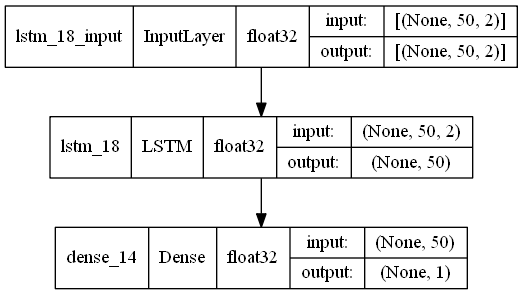

In [326]:
plot_model(model_combo, show_shapes=True, show_dtype= True)

In [327]:
model_combo.fit(x_train_comb, y_train_comb, epochs= 200, 
    validation_data= [x_val_comb, y_val_comb])

Epoch 1/200
26/26 [==============================] - 6s 62ms/step - loss: 63540.4258 - mean_absolute_error: 220.8323 - val_loss: 50968.8477 - val_mean_absolute_error: 218.6972
Epoch 2/200
26/26 [==============================] - 1s 25ms/step - loss: 48314.8672 - mean_absolute_error: 183.9528 - val_loss: 37093.6992 - val_mean_absolute_error: 182.9701
Epoch 3/200
26/26 [==============================] - 1s 23ms/step - loss: 36924.8984 - mean_absolute_error: 150.9085 - val_loss: 26693.6777 - val_mean_absolute_error: 150.4855
Epoch 4/200
26/26 [==============================] - 0s 19ms/step - loss: 28691.0254 - mean_absolute_error: 126.4933 - val_loss: 19396.2930 - val_mean_absolute_error: 122.7233
Epoch 5/200
26/26 [==============================] - 0s 16ms/step - loss: 23144.6797 - mean_absolute_error: 110.9308 - val_loss: 14378.6133 - val_mean_absolute_error: 105.5209
Epoch 6/200
26/26 [==============================] - 0s 15ms/step - loss: 19492.8242 - mean_absolute_error: 101.2155 - v

KeyboardInterrupt: 

In [ ]:
model_combo.evaluate(x_val_comb, y_val_comb)

6/6 [==============================] - 0s 14ms/step - loss: 6108.2944 - mean_absolute_error: 75.9369


[6108.29443359375, 75.93685913085938]

In [ ]:
model_combo.predict(x_val_comb)

array([[239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],
       [239.88322],


In [ ]:
len(model_combo.get_weights())

5

In [ ]:
for a in model_combo.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_1/lstm_cell_1/kernel:0
Weights shape is (2, 200)
Layer name is lstm_1/lstm_cell_1/recurrent_kernel:0
Weights shape is (50, 200)
Layer name is lstm_1/lstm_cell_1/bias:0
Weights shape is (200,)
Layer name is dense_1/kernel:0
Weights shape is (50, 1)
Layer name is dense_1/bias:0
Weights shape is (1,)


In [ ]:
model_combo.predict(x_test_comb).shape

(179, 1)

In [ ]:
model_combo.evaluate(x_test_comb, y_test_comb)

6/6 [==============================] - 0s 15ms/step - loss: 37490.4258 - mean_absolute_error: 175.6236


[37490.42578125, 175.6235809326172]

### **<span style = "color: #5494ff ;">6.2.3 Model 2 day_wise</span>**

In [ ]:
model_1 = Sequential([
    LSTM(50,input_shape = (50,1), return_sequences= True),
    layers.Dropout(0.3),
    LSTM(50, return_sequences= True),
    LSTM(50, return_sequences= False),
    Dense(1)
])

model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


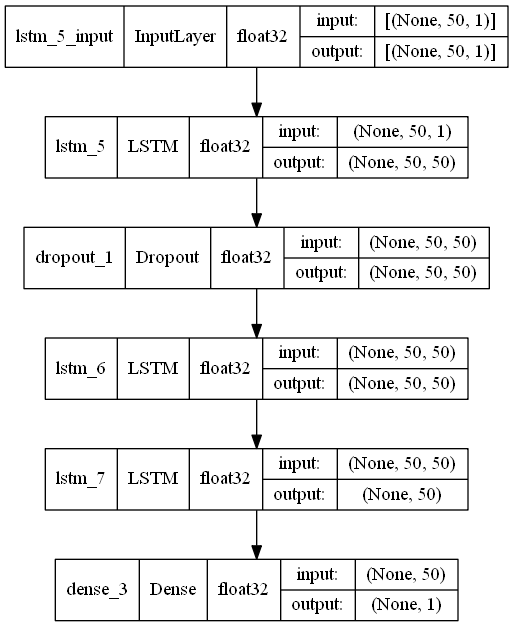

In [ ]:
plot_model(model_1, show_shapes=True, show_dtype= True)

In [ ]:
x_train_mean.shape

(948, 50, 1)

In [ ]:
model_1.fit(x_train_mean, y_train_mean, epochs= 1, 
    validation_data= [x_val_mean, y_val_mean])

30/30 [==============================] - 9s 105ms/step - loss: 50471.9062 - mean_absolute_error: 191.4802 - val_loss: 50285.8594 - val_mean_absolute_error: 222.1358


In [ ]:
model_combo.evaluate(x_val_comb, y_val_comb)

6/6 [==============================] - 0s 16ms/step - loss: 6108.2944 - mean_absolute_error: 75.9369


[6108.29443359375, 75.93685913085938]

In [ ]:
model_combo.evaluate(x_test_comb, y_test_comb)

6/6 [==============================] - 0s 41ms/step - loss: 37490.4258 - mean_absolute_error: 175.6236


[37490.42578125, 175.6235809326172]

## **<span style = "color: #5494ff ;">6.3 LGBoost</span>**

### **<span style = "color: #5494ff ;">6.3.1 Imports</span>**

In [ ]:
import lightgbm as lgb